In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
afmdata = np.genfromtxt('../Data/UnbackgroundedTXT/500nmGood-0')
afmdata= afmdata*(10**9)
height, width = afmdata.shape
afmimg=np.zeros((height, width, 3))

In [3]:
factor=(255)/(afmdata.max()-afmdata.min())
for i in range(height):
    for j in range(width):
        intensity=np.int((afmdata[i][j]-afmdata.min())*factor)
        #afmimg[i][j]=np.array([np.int((afmdata[i][j]-afmdata.min())*factor),0,0])
        afmimg[i][j]=np.array([intensity, intensity, intensity])

[[[  9   9   9]
  [ 10  10  10]
  [ 10  10  10]
  ..., 
  [ 40  40  40]
  [ 38  38  38]
  [ 36  36  36]]

 [[  9   9   9]
  [  9   9   9]
  [  9   9   9]
  ..., 
  [ 39  39  39]
  [ 37  37  37]
  [ 35  35  35]]

 [[  9   9   9]
  [ 10  10  10]
  [ 10  10  10]
  ..., 
  [ 39  39  39]
  [ 37  37  37]
  [ 36  36  36]]

 ..., 
 [[203 203 203]
  [204 204 204]
  [205 205 205]
  ..., 
  [210 210 210]
  [209 209 209]
  [208 208 208]]

 [[204 204 204]
  [205 205 205]
  [205 205 205]
  ..., 
  [210 210 210]
  [209 209 209]
  [208 208 208]]

 [[204 204 204]
  [205 205 205]
  [205 205 205]
  ..., 
  [193 193 193]
  [193 193 193]
  [193 193 193]]]
[[  9  10  10 ...,  40  38  36]
 [  9   9   9 ...,  39  37  35]
 [  9  10  10 ...,  39  37  36]
 ..., 
 [203 204 205 ..., 210 209 208]
 [204 205 205 ..., 210 209 208]
 [204 205 205 ..., 193 193 193]]


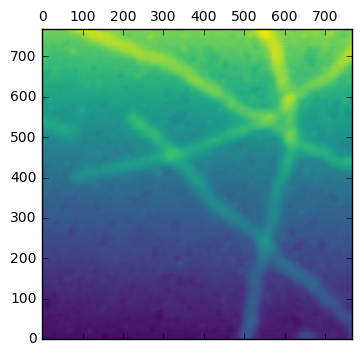

In [14]:
afmimg = np.uint8(afmimg)
grayscaled = cv2.cvtColor(afmimg,cv2.COLOR_BGR2GRAY)
plt.matshow(grayscaled, origin = 'lower', cmap = 'viridis')
print (afmimg)
print (grayscaled)

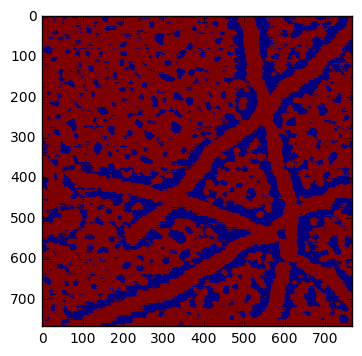

In [14]:
background = cv2.adaptiveThreshold(grayscaled, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 71, 2)
plt.imshow(background)

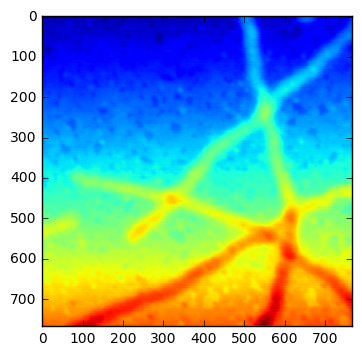

In [15]:
backgrounded = grayscaled - background
plt.imshow(backgrounded)